In [2]:
from google.colab import files
files.upload()

!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d datasnaek/youtube-new

from zipfile import ZipFile
file_name="youtube-new.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')
  
  
import tensorflow as tf

from sklearn.datasets import load_files
import numpy as np
import pandas as pd


Saving kaggle.json to kaggle.json
100% 200M/201M [00:08<00:00, 24.6MB/s]
100% 201M/201M [00:08<00:00, 25.4MB/s]
done


In [162]:
data=pd.read_csv("INvideos.csv")
data.head()

df=data
#data=df

df.drop(['video_id','thumbnail_link','description'],axis=1,inplace=True)
df.drop(['comments_disabled','ratings_disabled','video_error_or_removed'],axis=1,inplace=True)
data.head()

data['channel_title'].value_counts()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count
0,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882
1,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0
2,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149
3,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684
4,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66


In [196]:
# Just wanted to analyse SAB TV (channel_title) video title's and
# found out that almost every video that was trending was of taarak mehta ka ooltah chasmah ! HAHAHA :|)
data.dtypes
new=[]
new = [[x[0],x[1]] for x in data.values if x[2]=="SAB TV"]

for tp in new:
  if tp[1].lower().find("taarak mehta ka") == -1: 
    #print("NO") 
    tp.append('NO')
  else: 
    #print("YES")
    tp.append('YES')

new

sab_tv=pd.DataFrame(new,columns=['date','title','Bool'])
sab_tv.head()

sab_tv['Bool'].value_counts()
sns.countplot('Bool',data=sab_tv)

18.14.05    4
18.28.05    2
18.09.05    2
18.22.03    2
18.25.04    2
           ..
17.20.11    1
18.23.02    1
17.30.11    1
17.16.12    1
17.09.12    1
Name: date, Length: 203, dtype: int64

In [135]:
df['category_id'].value_counts()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count
0,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882
1,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0
2,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149
3,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684
4,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66
...,...,...,...,...,...,...,...,...,...,...
37347,18.14.06,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,RDC Rajasthani,23,2018-06-13T08:01:11.000Z,"twinkle vaishnav comedy|""twinkle vaishnav""|""tw...",214378,3291,404,196
37348,18.14.06,Seetha | Flowers | Ep# 364,Flowers TV,24,2018-06-13T11:30:04.000Z,"flowers serials|""actress""|""malayalam serials""|...",406828,1726,478,1428
37349,18.14.06,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,Mazhavil Manorama,24,2018-06-13T05:00:02.000Z,"mazhavil manorama|""bhramanam full episode""|""gt...",386319,1216,453,697
37350,18.14.06,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,Tarang TV,24,2018-06-13T15:07:49.000Z,"tarang|""tarang tv""|""tarang tv online""|""tarang ...",130263,698,115,65


In [46]:
import json

with open('./IN_category_id.json') as f:
  data1 = json.load(f)

print(data1)

lis=data1['items']
print(lis)

rows_list = []
for row in lis:
  dict1 = {'id':row['id'],'title':row['snippet']['title']}
  rows_list.append(dict1)

print(rows_list)
index = pd.DataFrame(rows_list) 
index.set_index('id', inplace=True)

ind_dict=index.to_dict()
index.head()

{'title': {'1': 'Film & Animation',
  '10': 'Music',
  '15': 'Pets & Animals',
  '17': 'Sports',
  '18': 'Short Movies',
  '19': 'Travel & Events',
  '2': 'Autos & Vehicles',
  '20': 'Gaming',
  '21': 'Videoblogging',
  '22': 'People & Blogs',
  '23': 'Comedy',
  '24': 'Entertainment',
  '25': 'News & Politics',
  '26': 'Howto & Style',
  '27': 'Education',
  '28': 'Science & Technology',
  '30': 'Movies',
  '31': 'Anime/Animation',
  '32': 'Action/Adventure',
  '33': 'Classics',
  '34': 'Comedy',
  '35': 'Documentary',
  '36': 'Drama',
  '37': 'Family',
  '38': 'Foreign',
  '39': 'Horror',
  '40': 'Sci-Fi/Fantasy',
  '41': 'Thriller',
  '42': 'Shorts',
  '43': 'Shows',
  '44': 'Trailers'}}

In [106]:
dt=data.groupby('category_id')
dtt=dt.sum()
dtt['category']='xyz'
dtt['id'] = dtt.index

i=0
for dft in dtt.values:
  dtt[i:i+1].category=ind_dict.get('title').get(str(dft[5]))
  i=i+1

dtt.head()

,views,likes,dislikes,comment_count,category,id
category_id,,,,,,
1,3847149504,69241553,4315081,5789446,Film & Animation,1
2,30384725,539571,22284,86488,Autos & Vehicles,2
10,10150844485,254328536,15030992,17595070,Music,10
15,4879743,362534,6488,42056,Pets & Animals,15
17,1379949159,32969986,1316379,2717679,Sports,17


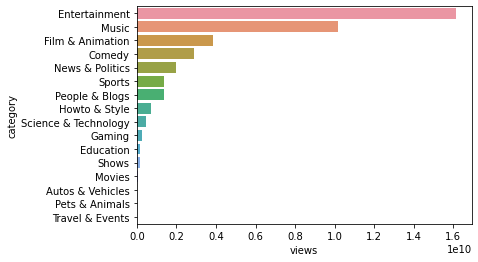

In [119]:
import seaborn as sns
dtt_views=dtt.sort_values('views',ascending=False)
dtt.head()

sns.barplot(y='category',x='views',data=dtt_views)

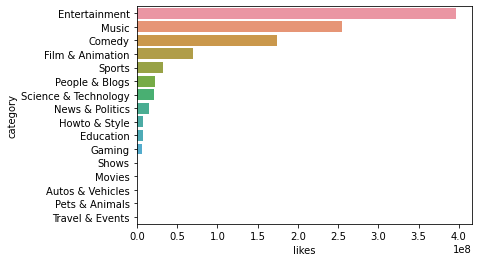

In [123]:
dtt_likes=dtt.sort_values('likes',ascending=False)

sns.barplot(y='category',x='likes',data=dtt_likes)